# 3 points in 3D

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
lbox=10

n_vertices = 3
max_module = 2.0

vertices = np.random.uniform(-lbox+max_module, lbox-max_module, (n_vertices, 2))
v_vertices = np.random.uniform(-1, 1, (n_vertices, 2))
v_vertices = max_module*v_vertices/np.linalg.norm(np.ravel(v_vertices))

In [17]:
vertices[0,:]=[7.0, 0.0]
vertices[1,:]=[-5, -5]
vertices[2,:]=[-5, 5]

In [30]:
n_points = 500
points = np.random.uniform(-10, 10, (n_points, 2))
v_points = np.zeros((n_points, 2))

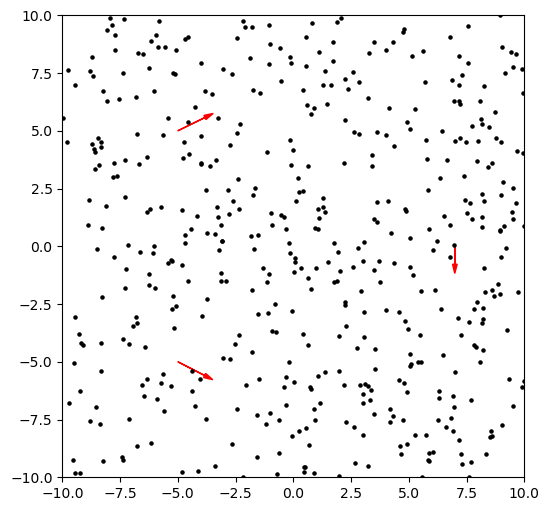

In [31]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r')

plt.scatter(points[:,0], points[:,1], s=5, c='k')
    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()

In [32]:
def barycentric_coords(vertices, point):
    T = (np.array(vertices[:-1])-vertices[-1]).T
    v = np.dot(la.inv(T), np.array(point)-vertices[-1])
    v.resize(len(vertices))
    v[-1] = 1-v.sum()
    return v

In [41]:
all_bcoords = []

for ii in range(n_points):
    bcoords = barycentric_coords(vertices, points[ii])
    all_bcoords.append(bcoords)
    if (all_bcoords[ii][0]>=0 and all_bcoords[ii][1]>=0 and all_bcoords[ii][2]>=0):
        v_points[ii] = bcoords[0]*v_vertices[0]+bcoords[1]*v_vertices[1]+bcoords[2]*v_vertices[2]
    elif (1>all_bcoords[ii][0]>0 and 1>all_bcoords[ii][1]>0 and all_bcoords[ii][2]<0):
        print(all_bcoords[ii])

[ 0.76640342  0.87914782 -0.64555124]
[ 0.90292678  0.97276744 -0.87569422]
[ 0.63498677  0.96592185 -0.60090861]
[ 0.4907447   0.95842952 -0.44917422]
[ 0.60668991  0.95669947 -0.56338937]
[ 0.5128529   0.92126653 -0.43411942]
[ 0.80275503  0.96198827 -0.7647433 ]
[ 0.4183834   0.87762924 -0.29601264]
[ 0.83910854  0.17033941 -0.00944795]
[ 0.71243775  0.58843615 -0.30087389]
[ 0.60215254  0.44167365 -0.04382619]
[ 0.81720532  0.68220765 -0.49941297]
[ 0.45305317  0.65369948 -0.10675266]
[ 0.99196263  0.80345747 -0.7954201 ]
[ 0.87275552  0.44771705 -0.32047256]
[ 0.4692642   0.69298738 -0.16225157]
[ 0.38942654  0.9920795  -0.38150604]
[ 0.5808973   0.74988252 -0.33077983]
[ 0.95047828  0.29828396 -0.24876224]
[ 0.77781799  0.84737563 -0.62519362]
[ 0.71195804  0.67497317 -0.38693121]
[ 0.67214274  0.5574106  -0.22955334]
[ 0.70811496  0.87334742 -0.58146238]
[ 0.67084463  0.44741624 -0.11826088]
[ 0.38431873  0.91577794 -0.30009667]
[ 0.75260058  0.3983878  -0.15098837]
[ 0.3908174 

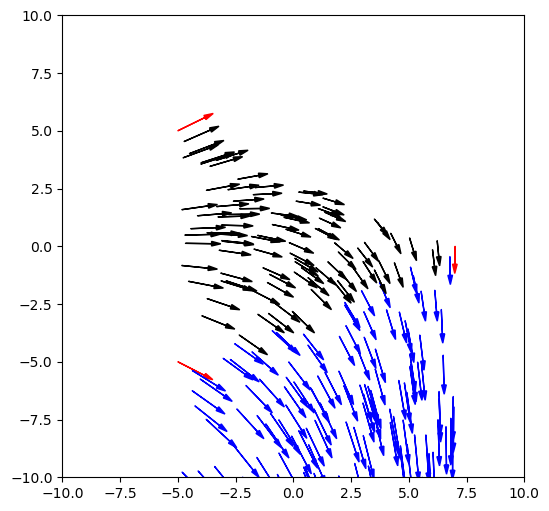

In [47]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r')

for ii in range(n_points):
    if (np.all(all_bcoords[ii]>0)):
        plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
            head_width=0.2, head_length=0.4, fc='k', ec='k')
    if (1>all_bcoords[ii][0]>0 and all_bcoords[ii][2]<0):
        plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
            head_width=0.2, head_length=0.4, fc='b', ec='b')
    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()